<a href="https://colab.research.google.com/github/meduardajustino/on34-python-s17-s18-projeto-final/blob/main/S17_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Impacto da Inflação sobre o Poder de Compra: uma análise multidimensional**

Este projeto tem como objetivo realizar uma análise detalhada sobre os impactos da inflação no poder de compra dos brasileiros, utilizando dados econômicos e ferramentas de análise de dados em Python. A análise busca abordar questões relacionadas à variação do poder de compra ao longo dos últimos anos (janeiro de 2019 a agosto de 2024) e os fatores que mais influenciam essa variação.

## Coleta de dados

A coleta de dados foi feita completamente pelo site de dados do Instituto de Pesquisa Econômica Aplicada (IPEA) - [IPEA Data](http://www.ipeadata.gov.br/).

Os arquivos em CSV usados podem ser baixados no [Google Drive](https://drive.google.com/drive/folders/1y8CCcTpFpP6EgM6sFynQVHQB5ICQ9Te2).

## Objetivos do projeto

1. **Variação do Poder de Compra nos últimos 4 anos**: Avaliar como o poder de compra dos brasileiros foi impactado pela inflação e pelos reajustes salariais ao longo dos últimos quatro anos.

2. **Impacto da Inflação e dos Reajustes Salariais**: Estudar a relação entre o aumento da inflação e os reajustes salariais, observando se o poder de compra aumentou ou diminuiu neste período.

3. **INPC x IPCA**: Explicar as diferenças entre o INPC e o IPCA, destacando qual índice é mais utilizado no cálculo da inflação e em que circunstâncias.

4. **Salário Mínimo Real x Vigente**: Comparar o salário mínimo real com o salário mínimo vigente, e observar o impacto do INPC sobre o reajuste salarial ao longo do tempo.

5. **Relação com a Taxa de Desemprego**: Analisar a relação entre a taxa de desemprego e o poder de compra, verificando se há maior incentivo ao consumo quando ocorrem reajustes salariais.

6. **Sensibilidade por setor**: Identificar os setores mais sensíveis às variações inflacionárias e analisar como essas variações afetam o cálculo da cesta de consumo.

7. **Endividamento e IPCA**: Avaliar se o aumento do endividamento das famílias tem relação direta com a variação do IPCA, especialmente em períodos de alta inflacionária.

---

Para contribuições, criticas ou sugestões na análise, sinta-se à vontade para criar um pull request no GitHub: [Repositório 1](https://github.com/meduardajustino/on34-python-s17-s18-projeto-final) ou [Repositório 2](https://github.com/---/on34-python-s17-s18-projeto-final).


## Extração dos dados

A partir dos arquivos csv disponibilizados no drive citado anteriormente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_poder_compra = pd.read_csv('Poder de compra.csv', sep=';')
df_poder_compra

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente - R$,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min
0,2019.01,"0,32","0,36","1363,03",998,"12,2","0,6","93,03","109,96"
1,2019.02,"0,43","0,54","1355,7",998,"12,6","0,62","95,38","113,66"
2,2019.03,"0,75","0,77","1345,34",998,"12,8","0,62","94,92","113,3"
3,2019.04,"0,57","0,6","1337,32",998,"12,6","0,63","93,06","111,32"
4,2019.05,"0,13","0,15","1335,32",998,"12,4","0,63","91,48","109,62"
...,...,...,...,...,...,...,...,...,...
63,2024.04,"0,38","0,37","1423,75",1412,"7,5","0,78","100,12","118,28"
64,2024.05,"0,46","0,46","1417,23",1412,"7,1","0,79","100,2","117,24"
65,2024.06,"0,21","0,25","1413,69",1412,"6,9","0,79","99,59","115,79"
66,2024.07,"0,38","0,26","1410,02",1412,"6,8","0,78","98,76","115,86"


In [ ]:
# Convertendo colunas para o tipo float caso não for identificado
for coluna in df_poder_compra.columns[1:]:
    df_poder_compra[coluna] = df_poder_compra[coluna].astype(str).str.replace(',', '.').astype(float)

In [ ]:
df_inpc_alimentos = pd.read_csv('INPC - Alimentos e Bebidas.csv', sep=';')
df_inpc_alimentos.head()

,Data,"INPC - alimentos e bebidas - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCAB12",Unnamed: 2
0,1980.10,"6,55",NaN
1,1980.11,"12,09",NaN
2,1980.12,"7,27",NaN
3,1981.01,"5,94",NaN
4,1981.02,"5,22",NaN


In [ ]:
df_inpc_alimentos.columns

Index(['Data',
       'INPC - alimentos e bebidas - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCAB12',
       'Unnamed: 2'],
      dtype='object')

In [ ]:
df_inpc_alimentos = df_inpc_alimentos.drop('Unnamed: 2', axis=1)
df_inpc_alimentos.head()

,Data,"INPC - alimentos e bebidas - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCAB12"
0,1980.10,"6,55"
1,1980.11,"12,09"
2,1980.12,"7,27"
3,1981.01,"5,94"
4,1981.02,"5,22"


In [ ]:
df_inpc_alimentos = df_inpc_alimentos.rename({'INPC - alimentos e bebidas - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCAB12': 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)'}, axis = 1)
df_inpc_alimentos.head()

,Data,INPC - alimentos e bebidas - taxa de variação - (% a.m.)
0,1980.10,"6,55"
1,1980.11,"12,09"
2,1980.12,"7,27"
3,1981.01,"5,94"
4,1981.02,"5,22"


In [ ]:
df_poder_compra = pd.merge(df_poder_compra, df_inpc_alimentos, on='Data')
df_poder_compra.head()

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente - R$,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.)
0,2019.01,0.32,0.36,1363.03,998.0,12.2,0.60,93.03,109.96,"0,9"
1,2019.02,0.43,0.54,1355.70,998.0,12.6,0.62,95.38,113.66,"0,94"
2,2019.03,0.75,0.77,1345.34,998.0,12.8,0.62,94.92,113.30,"1,5"
3,2019.04,0.57,0.60,1337.32,998.0,12.6,0.63,93.06,111.32,"0,64"
4,2019.05,0.13,0.15,1335.32,998.0,12.4,0.63,91.48,109.62,"-0,59"


In [ ]:
df_inpc_transporte = pd.read_csv('INPC - Transportes.csv', sep=';')
df_inpc_transporte.head()

,Data,"INPC - transportes - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCTC12",Unnamed: 2
0,1980.10,"2,2",NaN
1,1980.11,"10,96",NaN
2,1980.12,"14,51",NaN
3,1981.01,"5,94",NaN
4,1981.02,"4,46",NaN


In [ ]:
df_inpc_transporte.columns

Index(['Data',
       'INPC - transportes - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCTC12',
       'Unnamed: 2'],
      dtype='object')

In [ ]:
df_inpc_transporte = df_inpc_transporte.drop('Unnamed: 2', axis=1)
df_inpc_transporte = df_inpc_transporte.rename({'INPC - transportes - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCTC12': 'INPC - transportes - taxa de variação - (% a.m.)'}, axis=1)
df_inpc_transporte.head()

,Data,INPC - transportes - taxa de variação - (% a.m.)
0,1980.10,"2,2"
1,1980.11,"10,96"
2,1980.12,"14,51"
3,1981.01,"5,94"
4,1981.02,"4,46"


In [ ]:
df_poder_compra = pd.merge(df_poder_compra, df_inpc_transporte, on='Data')
df_poder_compra.head()

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente - R$,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.)
0,2019.01,0.32,0.36,1363.03,998.0,12.2,0.60,93.03,109.96,"0,9","0,61"
1,2019.02,0.43,0.54,1355.70,998.0,12.6,0.62,95.38,113.66,"0,94","0,34"
2,2019.03,0.75,0.77,1345.34,998.0,12.8,0.62,94.92,113.30,"1,5","1,18"
3,2019.04,0.57,0.60,1337.32,998.0,12.6,0.63,93.06,111.32,"0,64","0,91"
4,2019.05,0.13,0.15,1335.32,998.0,12.4,0.63,91.48,109.62,"-0,59","0,56"


In [ ]:
df_inpc_saude = pd.read_csv('INPC - Saúde e Cuidados Pessoais.csv', sep=';')
df_inpc_saude.head()

,Data,"INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCSC12",Unnamed: 2
0,1980.10,"7,62",NaN
1,1980.11,"3,43",NaN
2,1980.12,"3,15",NaN
3,1981.01,"3,38",NaN
4,1981.02,"4,01",NaN


In [ ]:
df_inpc_saude.columns

Index(['Data',
       'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCSC12',
       'Unnamed: 2'],
      dtype='object')

In [ ]:
df_inpc_saude = df_inpc_saude.drop('Unnamed: 2', axis=1)
df_inpc_saude = df_inpc_saude.rename({'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCSC12': 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)'}, axis=1)
df_inpc_saude.head()

,Data,INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)
0,1980.10,"7,62"
1,1980.11,"3,43"
2,1980.12,"3,15"
3,1981.01,"3,38"
4,1981.02,"4,01"


In [ ]:
df_poder_compra = pd.merge(df_poder_compra, df_inpc_saude, on='Data')
df_poder_compra.tail()

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente - R$,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)
63,2024.04,0.38,0.37,1423.75,1412.0,7.5,0.78,100.12,118.28,"0,57","0,32","1,08"
64,2024.05,0.46,0.46,1417.23,1412.0,7.1,0.79,100.20,117.24,"0,64","0,36","0,77"
65,2024.06,0.21,0.25,1413.69,1412.0,6.9,0.79,99.59,115.79,"0,44",0,"0,54"
66,2024.07,0.38,0.26,1410.02,1412.0,6.8,0.78,98.76,115.86,"-0,95","1,36","0,18"
67,2024.08,-0.02,-0.14,1412.00,1412.0,6.6,0.78,99.36,116.86,"-0,63","0,05","0,14"


In [ ]:
df_inpc_habitacao = pd.read_csv('INPC - Habitação.csv', sep=';')
df_inpc_habitacao.head()

,Data,"INPC - habitação - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCHA12",Unnamed: 2
0,1980.10,"5,91",NaN
1,1980.11,"3,16",NaN
2,1980.12,"5,76",NaN
3,1981.01,"3,66",NaN
4,1981.02,"9,25",NaN


In [ ]:
df_inpc_habitacao.columns

Index(['Data',
       'INPC - habitação - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCHA12',
       'Unnamed: 2'],
      dtype='object')

In [ ]:
df_inpc_habitacao = df_inpc_habitacao.drop('Unnamed: 2', axis=1)
df_inpc_habitacao = df_inpc_habitacao.rename({'INPC - habitação - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_INPCHA12': 'INPC - habitação - taxa de variação - (% a.m.)'}, axis=1)
df_inpc_habitacao.head()

,Data,INPC - habitação - taxa de variação - (% a.m.)
0,1980.10,"5,91"
1,1980.11,"3,16"
2,1980.12,"5,76"
3,1981.01,"3,66"
4,1981.02,"9,25"


In [ ]:
df_poder_compra = pd.merge(df_poder_compra, df_inpc_habitacao, on='Data')
df_poder_compra.head()

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente - R$,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.)
0,2019.01,0.32,0.36,1363.03,998.0,12.2,0.60,93.03,109.96,"0,9","0,61","0,01","0,16"
1,2019.02,0.43,0.54,1355.70,998.0,12.6,0.62,95.38,113.66,"0,94","0,34","0,4","0,32"
2,2019.03,0.75,0.77,1345.34,998.0,12.8,0.62,94.92,113.30,"1,5","1,18","0,37","0,32"
3,2019.04,0.57,0.60,1337.32,998.0,12.6,0.63,93.06,111.32,"0,64","0,91","1,89","0,3"
4,2019.05,0.13,0.15,1335.32,998.0,12.4,0.63,91.48,109.62,"-0,59","0,56","0,44",1


In [ ]:
df_poder_compra = df_poder_compra.rename({'Salário mínimo vigente  - R$': 'Salário mínimo vigente'}, axis=1)

# Limpeza da base de dados
###Verificando se os tipos dos dados das colunas estão corretos e corrigindo aqueles que não estão.

In [ ]:
df_poder_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Data                                                                68 non-null     float64
 1   IPCA  (% a.m.)                                                      68 non-null     float64
 2   INPC  (% a.m.)                                                      68 non-null     float64
 3   Salário mínimo real                                                 68 non-null     float64
 4   Salário mínimo vigente                                              68 non-null     float64
 5   Taxa de desempego (desocupação)                                     68 non-null     float64
 6    Endividamento e inadimplência do consumidor                        68 non-null     float64
 7   Intenção de consumo

In [ ]:
# Transformando as colunas de INPC por grupo de object para float
for coluna in df_poder_compra.columns[1:]:
    df_poder_compra[coluna] = df_poder_compra[coluna].astype(str).str.replace(',', '.').astype(float)

In [ ]:
# Transformando a coluna de data de object para datetime
def converter_data(value):
    ano, mes = map(int, str(value).split('.'))
    return pd.Timestamp(year=ano, month=mes, day=1)

df_poder_compra['Data'] = df_poder_compra['Data'].apply(converter_data)

df_poder_compra['Data'].tail()

df_poder_compra['Data_mes'] = df_poder_compra['Data'].dt.strftime('%Y-%m')

df_poder_compra[['Data', 'Data_mes']].tail()

,Data,Data_mes
63,2024-04-01,2024-04
64,2024-05-01,2024-05
65,2024-06-01,2024-06
66,2024-07-01,2024-07
67,2024-08-01,2024-08


In [ ]:
df_poder_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Data                                                                68 non-null     datetime64[ns]
 1   IPCA  (% a.m.)                                                      68 non-null     float64       
 2   INPC  (% a.m.)                                                      68 non-null     float64       
 3   Salário mínimo real                                                 68 non-null     float64       
 4   Salário mínimo vigente                                              68 non-null     float64       
 5   Taxa de desempego (desocupação)                                     68 non-null     float64       
 6    Endividamento e inadimplência do consumidor                

# Comparação do INPC e IPCA

A principal diferença entre o INPC (Índice Nacional de Preços ao Consumidor) e o IPCA (Índice de Preços ao Consumidor Amplo) está na faixa de renda das famílias consideradas na coleta de dados. Logo, eles tem o mesmo cálculo, contudo, amostras distintas.

Os  dois índices são calculados mensalmente pelo IBGE, para verificar a variação média dos preços da economia para o consumidor final. Para fazer esse cálculo, o IBGE pega uma amostra da população brasileira. E cada região recebe um peso, conforme a seguinte tabela:


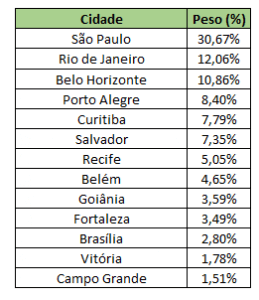

Nas cidades acima, são coletados dados de preços de uma cesta de produtos.

Cada um desses produtos também com o seu peso atribuído, conforme a tabela abaixo.


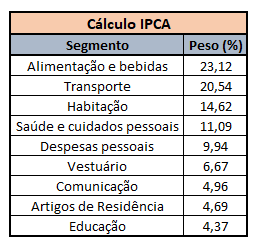

O cálculo é uma média ponderada das variações dos preços dos itens mais comuns das principais cidades do país.

 Por fim, a diferença da amostra ocorre visto que o INPC se concentra nas famílias com renda de 1 a 5 salários-mínimos e o IPCA abrange as famílias com rendimentos de 1 a 40 salários-mínimos.

In [ ]:
df_inpc_ipca = df_poder_compra[['Data', 'IPCA  (% a.m.)', 'INPC  (% a.m.)']]
df_inpc_ipca['Diferença percentual IPCA e INPC'] = df_inpc_ipca['IPCA  (% a.m.)'] - df_inpc_ipca['INPC  (% a.m.)']

df_inpc_ipca.tail()

<ipython-input-316-a6ca1d5d1075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inpc_ipca['Diferença percentual IPCA e INPC'] = df_inpc_ipca['IPCA  (% a.m.)'] - df_inpc_ipca['INPC  (% a.m.)']


,Data,IPCA (% a.m.),INPC (% a.m.),Diferença percentual IPCA e INPC
63,2024-04-01,0.38,0.37,0.01
64,2024-05-01,0.46,0.46,0.00
65,2024-06-01,0.21,0.25,-0.04
66,2024-07-01,0.38,0.26,0.12
67,2024-08-01,-0.02,-0.14,0.12


### Calculando as medidas descritivas

In [ ]:
# Calcular a média, desvio padrão, valor mínimo, primeiro e terceiro quartis e valor máximo dos percentuais do IPCA (2019.01 a 2024.8)
print("Média do IPCA (2019.01-2024.08):",np.mean(df_poder_compra['IPCA  (% a.m.)']))
print("Desvio Padrão:",np.std(df_poder_compra['IPCA  (% a.m.)']))
print("IPCA mínimo:",np.min(df_poder_compra['IPCA  (% a.m.)']))
print("Primeiro Quartil:",np.quantile(df_poder_compra['IPCA  (% a.m.)'],0.25))
print("Mediana (Q2):",np.median(df_poder_compra['IPCA  (% a.m.)']))
print("Terceiro Quartil:",np.quantile(df_poder_compra['IPCA  (% a.m.)'],0.75))
print("IPCA máximo:",np.max(df_poder_compra['IPCA  (% a.m.)']))

Média do IPCA (2019.01-2024.08): 0.46044117647058824
Desvio Padrão: 0.4337200026024156
IPCA mínimo: -0.68
Primeiro Quartil: 0.21
Mediana (Q2): 0.425
Terceiro Quartil: 0.77
IPCA máximo: 1.62


In [ ]:
# Calcular a média, desvio padrão, valor mínimo, primeiro e terceiro quartis e valor máximo dos percentuais do INPC (2019.01 a 2024.8)
print("Média do INPC (2019.01-2024.08):",np.mean(df_poder_compra['INPC  (% a.m.)']))
print("Desvio Padrão:",np.std(df_poder_compra['INPC  (% a.m.)']))
print("INPC mínimo:",np.min(df_poder_compra['INPC  (% a.m.)']))
print("Primeiro Quartil:",np.quantile(df_poder_compra['INPC  (% a.m.)'],0.25))
print("Mediana (Q2):",np.median(df_poder_compra['INPC  (% a.m.)']))
print("Terceiro Quartil:",np.quantile(df_poder_compra['INPC  (% a.m.)'],0.75))
print("INPC máximo:",np.max(df_poder_compra['INPC  (% a.m.)']))

Média do INPC (2019.01-2024.08): 0.4657352941176471
Desvio Padrão: 0.44379153882289807
INPC mínimo: -0.6
Primeiro Quartil: 0.165
Mediana (Q2): 0.455
Terceiro Quartil: 0.78
INPC máximo: 1.71


### Análise gráfica dos índices

<ipython-input-319-5487d75d3730>:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


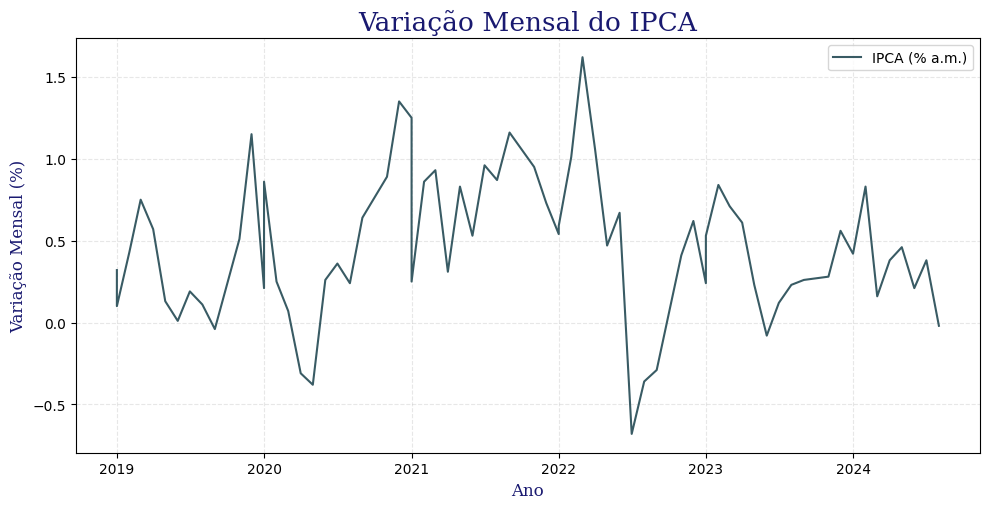

In [ ]:
# Variação Mensal do IPCA
def _plot_series(xs, ys, label, color):
    plt.plot(xs, ys, label=label, color=color)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_poder_compra.sort_values('Data', ascending=True)
_plot_series(df_sorted['Data'], df_sorted['IPCA  (% a.m.)'], label='IPCA (% a.m.)', color='#395b64')

font1 = {'family': 'serif', 'color': 'midnightblue', 'size': 19}
font2 = {'family': 'serif', 'color': 'midnightblue', 'size': 12}
plt.title('Variação Mensal do IPCA', fontdict=font1)
plt.xlabel('Ano', fontdict=font2)
plt.ylabel('Variação Mensal (%)', fontdict=font2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-320-01a84f783131>:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


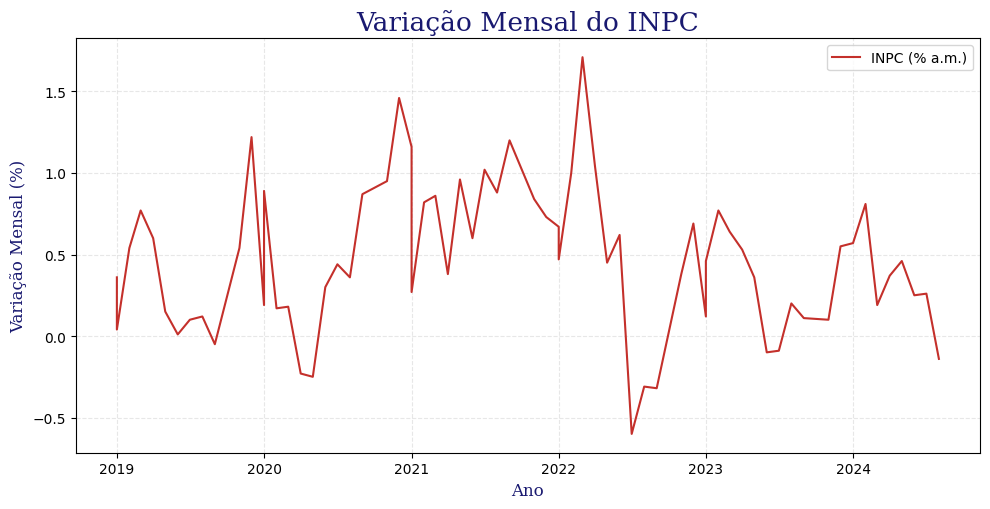

In [ ]:
# Variação Mensal do INPC
def _plot_series(xs, ys, label, color):
    plt.plot(xs, ys, label=label, color=color)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_poder_compra.sort_values('Data', ascending=True)
_plot_series(df_sorted['Data'], df_sorted['INPC  (% a.m.)'], label='INPC (% a.m.)', color='#c4302b')

font1 = {'family': 'serif', 'color': 'midnightblue', 'size': 19}
font2 = {'family': 'serif', 'color': 'midnightblue', 'size': 12}
plt.title('Variação Mensal do INPC', fontdict=font1)
plt.xlabel('Ano', fontdict=font2)
plt.ylabel('Variação Mensal (%)', fontdict=font2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

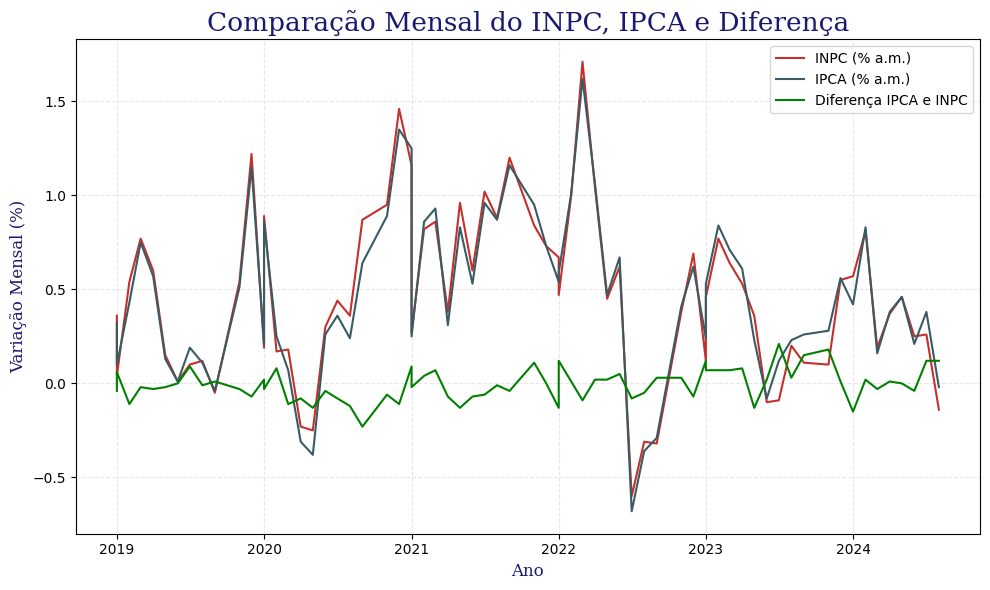

In [ ]:
#Comparação gráfica entre os índices e a diferença percentual
import pandas as pd
from matplotlib import pyplot as plt

def plot_series(xs, ys, label, color):
    plt.plot(xs, ys, label=label, color=color)

plt.figure(figsize=(10, 6))
df_sorted = df_poder_compra.sort_values('Data', ascending=True)

plot_series(df_sorted['Data'], df_sorted['INPC  (% a.m.)'], label='INPC (% a.m.)', color='#c4302b')
plot_series(df_sorted['Data'], df_sorted['IPCA  (% a.m.)'], label='IPCA (% a.m.)', color='#395b64')

df_sorted['Diferença percentual IPCA e INPC'] = df_sorted['IPCA  (% a.m.)'] - df_sorted['INPC  (% a.m.)']
plot_series(df_sorted['Data'], df_sorted['Diferença percentual IPCA e INPC'], label='Diferença IPCA e INPC', color='green')

font1 = {'family': 'serif', 'color': 'midnightblue', 'size': 19}
font2 = {'family': 'serif', 'color': 'midnightblue', 'size': 12}
plt.title('Comparação Mensal do INPC, IPCA e Diferença', fontdict=font1)
plt.xlabel('Ano', fontdict=font2)
plt.ylabel('Variação Mensal (%)', fontdict=font2)
plt.grid(True, linestyle='--', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()

A análise da inflação no Brasil revela um panorama complexo e dinâmico, especialmente ao analisar os dados de **IPCA e INPC** ao longo dos últimos anos. No gráfico acima percebe-se um aumento significativo da inflação após o **primeiro semestre de 2019**, impulsionado por fatores como a instabilidade política, a alta nos preços de *commodities* e os efeitos das reformas econômicas, como a reforma da previdência e a reforma tributária.

Durante os meses de **abril e maio de 2020**, nota-se uma queda nas taxas de inflação, que pode ser explicada em parte pelos impactos da pandemia do COVID-19. O isolamento social e a diminuição da atividade econômica resultaram em uma redução temporária na demanda, levando a uma **deflação** em certos segmentos do mercado.

Entretanto, a recuperação econômica e a demanda reprimida, foram importantes para que a inflação fechasse o ano de 2020 com taxas elevadas, afetando principalmente as famílias e o comércio brasileiro. Essa pressão inflacionária teve um impacto direto no poder de compra da população, tornando os bens essenciais mais caros.

Entre **julho e setembro de 2022**, tanto o IPCA quanto o INPC apresentaram uma queda conjunta e semelhante. Este fenômeno pode ser explicado pela *estabilização dos preços de energia e alimentos*, além de medidas do governo para conter a inflação, que, embora temporárias, ajudaram a aliviar a pressão sobre os consumidores.

Atualmente, em agosto de 2024, os dados indicam que a inflação está em um caminho de queda. Todavia, esse cenário deve ser analisado com cautela, uma vez que a inflação é influenciada por uma série de fatores econômicos e sociais. O aumento dos custos de produção, as flutuações no mercado de commodities e as políticas monetárias implementadas pelo governo podem impactar essa trajetória.

# Comparação entre salário mínimo real e salário mínimo vigente

O salário mínimo vigente (ou nominal) é o menor valor que o trabalhador formal deve receber pelo seu serviço, fixado pelo Governo Federal. O salário mínimo real é ajustado pela inflação, ou seja, é o valor que o salário deveria se equiparar de maneira a acompanhar a inflação, mantendo o poder de compra.

In [ ]:
df_poder_compra[['Data', 'Salário mínimo real', 'Salário mínimo vigente']]

,Data,Salário mínimo real,Salário mínimo vigente
0,2019-01-01,1363.03,998.0
1,2019-02-01,1355.70,998.0
2,2019-03-01,1345.34,998.0
3,2019-04-01,1337.32,998.0
4,2019-05-01,1335.32,998.0
...,...,...,...
63,2024-04-01,1423.75,1412.0
64,2024-05-01,1417.23,1412.0
65,2024-06-01,1413.69,1412.0
66,2024-07-01,1410.02,1412.0


### Medidas descritivas para os salários

In [ ]:
# Medidas descritivas do salário mínimo real
print("Média do Salário Mínimo Real):", np.mean(df_poder_compra['Salário mínimo real']))
print("Desvio Padrão:", np.std(df_poder_compra['Salário mínimo real']))
print("Salário Real mínimo:", np.min(df_poder_compra['Salário mínimo real']))
print("Primeiro Quartil:", np.quantile(df_poder_compra['Salário mínimo real'], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra['Salário mínimo real']))
print("Terceiro Quartil:", np.quantile(df_poder_compra['Salário mínimo real'], 0.75))
print("Salário Real máximo:", np.max(df_poder_compra[['Salário mínimo real']]))

Média do Salário Mínimo Real): 1344.9242647058825
Desvio Padrão: 41.630966038309424
Salário Real mínimo: 1242.3
Primeiro Quartil: 1315.4075
Mediana (Q2): 1345.78
Terceiro Quartil: 1366.1775
Salário Real máximo: 1443.33


In [ ]:
# Medidas descritivas do salário mínimo vigente
print("Média do Salário Mínimo Vigente):", np.mean(df_poder_compra['Salário mínimo vigente']))
print("Desvio Padrão:", np.std(df_poder_compra['Salário mínimo vigente']))
print("Salário Vigente mínimo:", np.min(df_poder_compra['Salário mínimo vigente']))
print("Primeiro Quartil:", np.quantile(df_poder_compra['Salário mínimo vigente'], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra['Salário mínimo vigente']))
print("Terceiro Quartil:", np.quantile(df_poder_compra['Salário mínimo vigente'], 0.75))
print("Salário Vigente máximo:", np.max(df_poder_compra[['Salário mínimo vigente']]))

Média do Salário Mínimo Vigente): 1166.4411764705883
Desvio Padrão: 140.44879560484387
Salário Vigente mínimo: 998.0
Primeiro Quartil: 1045.0
Mediana (Q2): 1100.0
Terceiro Quartil: 1302.0
Salário Vigente máximo: 1412.0


In [ ]:
# Criando uma nova coluna com a diferença percentual entre salário mínimo real e vigente
salario_vigente = 'Salário mínimo vigente'
salario_real = 'Salário mínimo real'
df_poder_compra['Diferença percentual entre salários'] = ((df_poder_compra[salario_vigente] - df_poder_compra[salario_real]) / df_poder_compra[salario_real])*100

In [ ]:
df_poder_compra[['Data', 'Salário mínimo real', 'Salário mínimo vigente', 'Diferença percentual entre salários']]

,Data,Salário mínimo real,Salário mínimo vigente,Diferença percentual entre salários
0,2019-01-01,1363.03,998.0,-26.780775
1,2019-02-01,1355.70,998.0,-26.384893
2,2019-03-01,1345.34,998.0,-25.818009
3,2019-04-01,1337.32,998.0,-25.373134
4,2019-05-01,1335.32,998.0,-25.261361
...,...,...,...,...
63,2024-04-01,1423.75,1412.0,-0.825285
64,2024-05-01,1417.23,1412.0,-0.369030
65,2024-06-01,1413.69,1412.0,-0.119545
66,2024-07-01,1410.02,1412.0,0.140424


In [ ]:
# Medidas descritivas da diferença percentual entre o salário mínimo real e vigente
media_diferenca_salarios = np.mean(df_poder_compra['Diferença percentual entre salários'])
print(f"Média da diferença entre salários: {media_diferenca_salarios:.2f}%")
print("Desvio Padrão:", np.std(df_poder_compra['Diferença percentual entre salários']))
print("Diferença máxima:", np.min(df_poder_compra['Diferença percentual entre salários']))
print("Primeiro Quartil:", np.quantile(df_poder_compra['Diferença percentual entre salários'], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra['Diferença percentual entre salários']))
print("Terceiro Quartil:", np.quantile(df_poder_compra['Diferença percentual entre salários'], 0.75))
print("Diferença mínima:", np.max(df_poder_compra[['Diferença percentual entre salários']]))

Média da diferença entre salários: -13.36%
Desvio Padrão: 9.140567466419228
Diferença máxima: -26.780775184698797
Primeiro Quartil: -23.395755130190253
Mediana (Q2): -12.462410276221053
Terceiro Quartil: -4.310290575702573
Diferença mínima: 0.14042354009163122


In [ ]:
# Procurando datas em que o salário mínimo vigente é igual ao real
df_poder_compra[df_poder_compra['Diferença percentual entre salários'] == 0]

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.),Data_mes,Diferença percentual entre salários
67,2024-08-01,-0.02,-0.14,1412.0,1412.0,6.6,0.78,99.36,116.86,-0.63,0.05,0.14,-0.6,2024-08,0.0


In [ ]:
# Em quais datas a diferença entre o salário mínimo real e vigente foram mínimas
df_poder_compra.nlargest(10, 'Diferença percentual entre salários')

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.),Data_mes,Diferença percentual entre salários
66,2024-07-01,0.38,0.26,1410.02,1412.0,6.8,0.78,98.76,115.86,-0.95,1.36,0.18,0.75,2024-07,0.140424
67,2024-08-01,-0.02,-0.14,1412.00,1412.0,6.6,0.78,99.36,116.86,-0.63,0.05,0.14,-0.60,2024-08,0.000000
65,2024-06-01,0.21,0.25,1413.69,1412.0,6.9,0.79,99.59,115.79,0.44,0.00,0.54,0.29,2024-06,-0.119545
64,2024-05-01,0.46,0.46,1417.23,1412.0,7.1,0.79,100.20,117.24,0.64,0.36,0.77,0.62,2024-05,-0.369030
63,2024-04-01,0.38,0.37,1423.75,1412.0,7.5,0.78,100.12,118.28,0.57,0.32,1.08,-0.12,2024-04,-0.825285
62,2024-03-01,0.16,0.19,1429.01,1412.0,7.9,0.78,101.29,118.86,0.50,-0.08,0.32,0.15,2024-03,-1.190335
61,2024-02-01,0.83,0.81,1431.73,1412.0,7.8,0.78,102.73,120.64,0.95,1.04,0.62,0.31,2024-02,-1.378053
60,2024-01-01,0.42,0.57,1443.33,1412.0,7.6,0.78,102.91,120.81,1.51,-0.10,0.81,0.16,2024-01,-2.170675
59,2023-12-01,0.56,0.55,1356.97,1320.0,7.4,0.78,102.42,119.47,1.20,0.24,0.27,0.34,2023-12,-2.724452
58,2023-11-01,0.28,0.10,1364.44,1320.0,7.5,0.77,102.19,119.04,0.57,-0.30,-0.23,0.42,2023-11,-3.257014


In [ ]:
# Em quais datas a diferença entre o salário mínimo real e vigente foram máximas
df_poder_compra.nsmallest(10, 'Diferença percentual entre salários')

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.),Data_mes,Diferença percentual entre salários
0,2019-01-01,0.32,0.36,1363.03,998.0,12.2,0.60,93.03,109.96,0.90,0.61,0.01,0.16,2019-01,-26.780775
1,2019-02-01,0.43,0.54,1355.70,998.0,12.6,0.62,95.38,113.66,0.94,0.34,0.40,0.32,2019-02,-26.384893
2,2019-03-01,0.75,0.77,1345.34,998.0,12.8,0.62,94.92,113.30,1.50,1.18,0.37,0.32,2019-03,-25.818009
3,2019-04-01,0.57,0.60,1337.32,998.0,12.6,0.63,93.06,111.32,0.64,0.91,1.89,0.30,2019-04,-25.373134
4,2019-05-01,0.13,0.15,1335.32,998.0,12.4,0.63,91.48,109.62,-0.59,0.56,0.44,1.00,2019-05,-25.261361
5,2019-06-01,0.01,0.01,1335.19,998.0,12.1,0.64,88.71,103.99,-0.18,-0.30,0.71,0.03,2019-06,-25.254084
6,2019-07-01,0.19,0.10,1333.85,998.0,12.0,0.64,87.55,101.00,-0.05,-0.41,-0.63,1.20,2019-07,-25.178993
8,2019-09-01,-0.04,-0.05,1332.92,998.0,11.9,0.65,90.16,104.01,-0.42,-0.01,0.78,0.04,2019-09,-25.126789
9,2019-01-01,0.10,0.04,1332.39,998.0,11.8,0.65,90.91,105.25,0.02,0.35,0.42,-0.60,2019-01,-25.097006
7,2019-08-01,0.11,0.12,1332.25,998.0,11.9,0.65,89.16,102.86,-0.49,-0.08,-0.14,1.18,2019-08,-25.089135


### Gráfico da comparação entre salário mínimo real e vigente

Como observado pelos filtros acima e o gráfico abaixo, as **maiores discrepâncias** entre o salário mínimo real e o vigente foram observadas no ano de **2019**, devido a estagnação do salário nominal frente ao aumento da inflação.

O cenário começa a mudar no final de 2019, quando houve o primeiro reajuste de salário pelo Governo Federal dentro do intervalo observado (Janeiro de 2019 até Agosto de 2024) e uma leve queda no salário real.
**Ao longo desses anos**, é constatada a **redução gradativa da diferença entre os salários**, motivada por reajustes salariais e controle da inflação.

O **panorama mais positivo**, em que o salário vigente é o mais próximo do real, ocorre entre o **final de 2023 e ao longo de 2024**. Importante destacar que em **Julho de 2024** o salário nominal foi levemente maior (cerca de 0.14%) que o real, sendo a única ocorrência de tal evento dentro do período considerado, denotando maior poder de compra que anos anteriores. Apesar do suave aumento do salário real em **Agosto de 2024**, o vigente continua equiparado, e o cenário ainda é positivo.



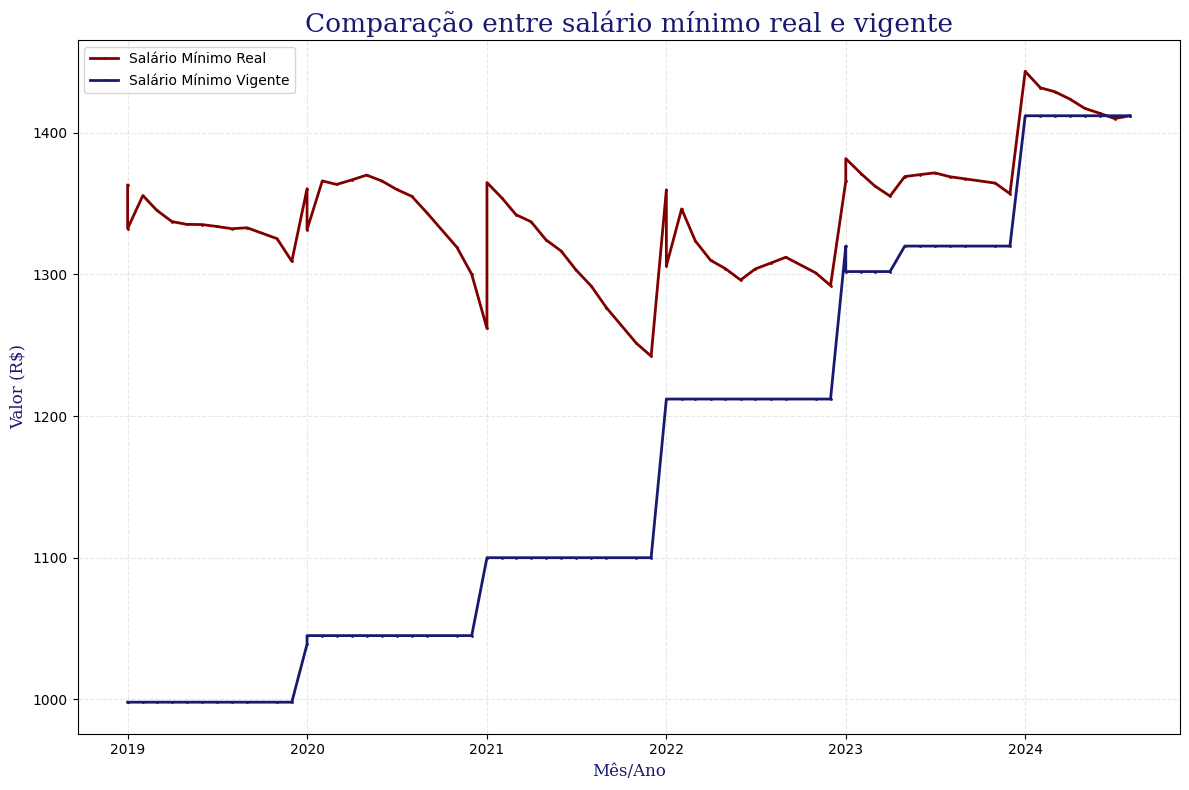

In [ ]:
df_poder_compra = df_poder_compra.sort_values(by='Data').reset_index(drop=True)

plt.figure(figsize=(12, 8))

# Salário mínimo real
plt.plot(df_poder_compra['Data'], df_poder_compra['Salário mínimo real'], linestyle='-', color = 'maroon', marker = 'o', ms = 1, label='Salário Mínimo Real', linewidth=2)

# salário mínimo vigente
plt.plot(df_poder_compra['Data'], df_poder_compra['Salário mínimo vigente'], linestyle='-', color='midnightblue', marker = 'o', ms = 1, label='Salário Mínimo Vigente', linewidth=2)

font1 = {'family':'serif','color':'midnightblue','size':19}
font2 = {'family':'serif','color':'midnightblue','size':12}

plt.title('Comparação entre salário mínimo real e vigente', fontdict=font1)
plt.xlabel('Mês/Ano', fontdict=font2)
plt.ylabel('Valor (R$)', fontdict=font2)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()


# Comparação do INPC por categorias

Como foi visto, o INPC (Índice Nacional de Preços ao Consumidor) é calculado por meio da média ponderada das variações dos preços dos itens mais consumidos nas principais cidades do país, medindo uma faixa de até 5 salários-mínimo.
Todos os bens e serviços computados são agrupados conforme as grandes categorias de consumo familiar:
- Alimentação e bebidas
- Habitação
- Transportes
- Saúde e Cuidados Pessoais
- Artigos de residência
- Vestuário
- Educação
- Comunicação
- Despesas Pessoais

Por impossibilidades na extração de dados de outros segmentos, o foco da análise será nos seguintes grupos: Alimentação e Bebidas, Transportes, Saúde e Cuidados Pessoais, e Habitação

In [ ]:
df_poder_compra[['Data', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)', 'INPC - transportes - taxa de variação - (% a.m.)', 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.)
0,2019-01-01,0.90,0.61,0.01,0.16
1,2019-01-01,0.02,0.35,0.42,-0.60
2,2019-02-01,0.94,0.34,0.40,0.32
3,2019-03-01,1.50,1.18,0.37,0.32
4,2019-04-01,0.64,0.91,1.89,0.30
...,...,...,...,...,...
63,2024-04-01,0.57,0.32,1.08,-0.12
64,2024-05-01,0.64,0.36,0.77,0.62
65,2024-06-01,0.44,0.00,0.54,0.29
66,2024-07-01,-0.95,1.36,0.18,0.75


In [ ]:
df_poder_compra.columns

Index(['Data', 'IPCA  (% a.m.)', 'INPC  (% a.m.)', 'Salário mínimo real',
       'Salário mínimo vigente', 'Taxa de desempego (desocupação)',
       ' Endividamento e inadimplência do consumidor',
       'Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min',
       'Intenção de consumo das famílias (ICF) - Acima de 10 salários min',
       'INPC - alimentos e bebidas - taxa de variação - (% a.m.)',
       'INPC - transportes - taxa de variação - (% a.m.)',
       'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)',
       'INPC - habitação - taxa de variação - (% a.m.)', 'Data_mes',
       'Diferença percentual entre salários'],
      dtype='object')

### Medidas descritivas das taxas de variação

In [ ]:
# Medidas descritivas da taxa de variação dos preços dentro do segmento "Alimentos e bebidas"
media_alimentacao = np.mean(df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)'])
print(f"Média da Taxa de Variação de Alimentos e Bebidas (2019.01-2024.08): {media_alimentacao:.2f}%")
print("Desvio Padrão:", np.std(df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)']))
print("Taxa de variação mínima:", np.min(df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)']))
print("Primeiro Quartil:", np.quantile(df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)'], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)']))
print("Terceiro Quartil:", np.quantile(df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)'], 0.75))
print("Taxa de variação máxima:", np.max(df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)']))

Média da Taxa de Variação de Alimentos e Bebidas (2019.01-2024.08): 0.64%
Desvio Padrão: 0.891009533481166
Taxa de variação mínima: -0.95
Primeiro Quartil: 0.115
Mediana (Q2): 0.57
Terceiro Quartil: 1.0275
Taxa de variação máxima: 3.66


In [ ]:
# Medidas descritivas da taxa de variação dos preços dentro do segmento "Transportes"
media_transportes = np.mean(df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)'])
print(f"Média da Taxa de Variação de Transportes (2019.01-2024.08): {media_transportes:.2f}%")
print("Desvio Padrão:", np.std(df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)']))
print("Taxa de variação mínima:", np.min(df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)']))
print("Primeiro Quartil:", np.quantile(df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)'], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)']))
print("Terceiro Quartil:", np.quantile(df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)'], 0.75))
print("Taxa de variação máxima:", np.max(df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)']))

Média da Taxa de Variação de Transportes (2019.01-2024.08): 0.45%
Desvio Padrão: 1.2427118587350934
Taxa de variação mínima: -4.44
Primeiro Quartil: -0.02
Mediana (Q2): 0.46499999999999997
Terceiro Quartil: 1.0475
Taxa de variação máxima: 3.54


In [ ]:
# Medidas descritivas da taxa de variação dos preços dentro do segmento "Saúde e Cuidados Pessoais"
media_saude = np.mean(df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)'])
print(f"Média da Taxa de Variação de Saúde e Cuidados Pessoais (2019.01-2024.08): {media_saude:.2f}%")
print("Desvio Padrão:", np.std(df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)']))
print("Taxa de variação mínima:", np.min(df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)']))
print("Primeiro Quartil:", np.quantile(df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)'], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)']))
print("Terceiro Quartil:", np.quantile(df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)'], 0.75))
print("Taxa de variação máxima:", np.max(df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)']))

Média da Taxa de Variação de Saúde e Cuidados Pessoais (2019.01-2024.08): 0.48%
Desvio Padrão: 0.6392248191185653
Taxa de variação mínima: -1.18
Primeiro Quartil: 0.0925
Mediana (Q2): 0.46499999999999997
Terceiro Quartil: 0.7875000000000001
Taxa de variação máxima: 2.08


In [ ]:
# Medidas descritivas da taxa de variação dos preços dentro do segmento "Habitação"
media_habitacao = np.mean(df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)'])
print(f"Média da Taxa de Variação de Habitação (2019.01-2024.08): {media_habitacao:.2f}%")
print("Desvio Padrão:", np.std(df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)']))
print("Taxa de variação mínima:", np.min(df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)']))
print("Primeiro Quartil:", np.quantile(df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)'], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)']))
print("Terceiro Quartil:", np.quantile(df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)'], 0.75))
print("Taxa de variação máxima:", np.max(df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)']))

Média da Taxa de Variação de Habitação (2019.01-2024.08): 0.43%
Desvio Padrão: 0.8461002925287882
Taxa de variação mínima: -1.65
Primeiro Quartil: 0.11499999999999999
Mediana (Q2): 0.41000000000000003
Terceiro Quartil: 0.7275
Taxa de variação máxima: 3.17


### Gráfico da Comparação da Variação dos Preços por Segmento

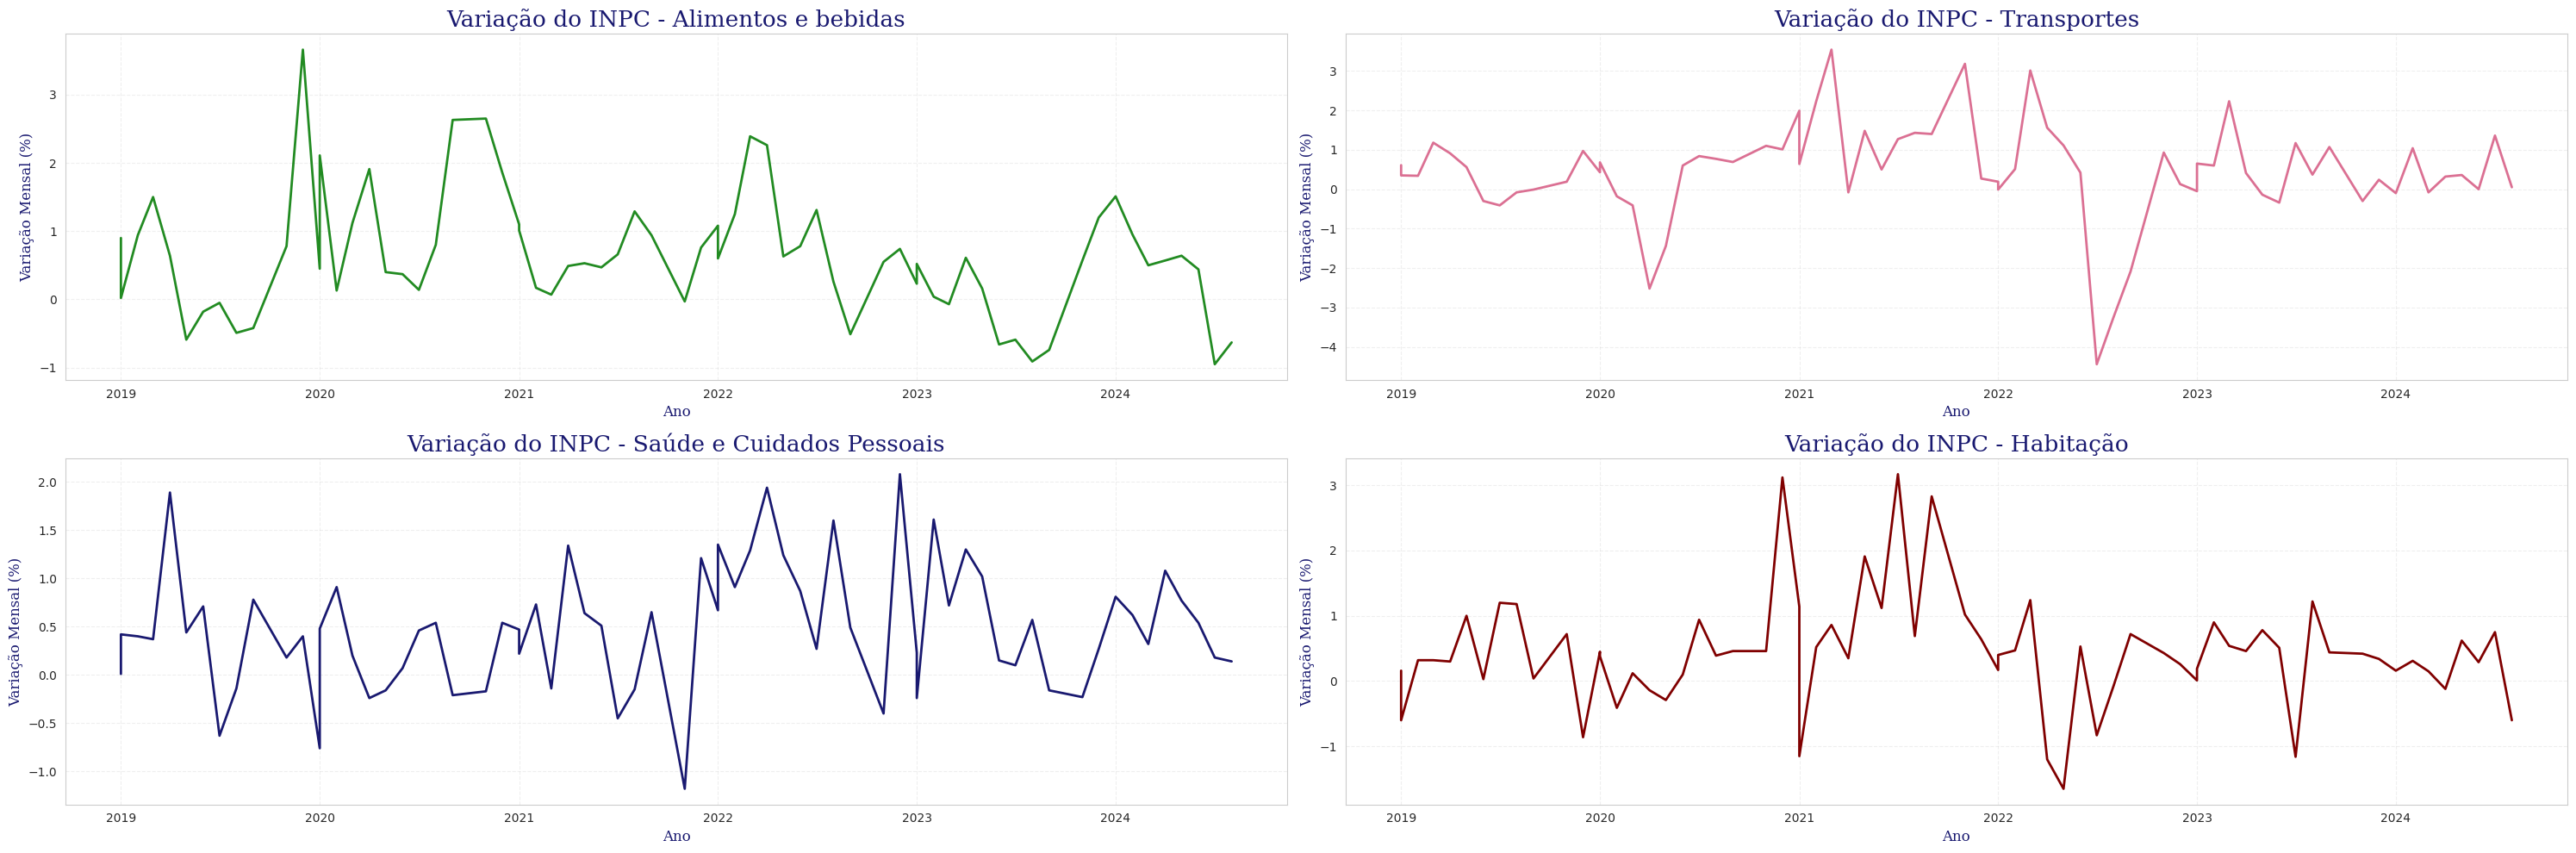

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(30, 10))
plt

font1 = {'family': 'serif', 'color': 'midnightblue', 'size': 19}
font2 = {'family': 'serif', 'color': 'midnightblue', 'size': 12}

axs[0, 0].plot(df_poder_compra['Data'], df_poder_compra['INPC - alimentos e bebidas - taxa de variação - (% a.m.)'], linestyle='-', color='forestgreen', linewidth=2)
axs[0, 0].set_title('Variação do INPC - Alimentos e bebidas', fontdict=font1)
axs[0, 0].set_xlabel('Ano', fontdict = font2)
axs[0, 0].set_ylabel('Variação Mensal (%)', fontdict=font2)
axs[0, 0].grid(True, linestyle='--', alpha=0.3)

axs[0, 1].plot(df_poder_compra['Data'], df_poder_compra['INPC - transportes - taxa de variação - (% a.m.)'], linestyle='-', color='palevioletred', linewidth=2)
axs[0, 1].set_title('Variação do INPC - Transportes', fontdict=font1)
axs[0, 1].set_xlabel('Ano', fontdict = font2)
axs[0, 1].set_ylabel('Variação Mensal (%)', fontdict=font2)
axs[0, 1].grid(True, linestyle='--', alpha=0.3)

axs[1, 0].plot(df_poder_compra['Data'], df_poder_compra['INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)'], linestyle='-', color='midnightblue', linewidth=2)
axs[1, 0].set_title('Variação do INPC - Saúde e Cuidados Pessoais', fontdict=font1)
axs[1, 0].set_xlabel('Ano', fontdict = font2)
axs[1, 0].set_ylabel('Variação Mensal (%)', fontdict=font2)
axs[1, 0].grid(True, linestyle='--', alpha=0.3)

axs[1, 1].plot(df_poder_compra['Data'], df_poder_compra['INPC - habitação - taxa de variação - (% a.m.)'], linestyle='-', color='maroon', linewidth=2)
axs[1, 1].set_title('Variação do INPC - Habitação', fontdict=font1)
axs[1, 1].set_xlabel('Ano', fontdict = font2)
axs[1, 1].set_ylabel('Variação Mensal (%)', fontdict=font2)
axs[1, 1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
inpc_alimentacao = df_poder_compra.iloc[:,9]
inpc_transportes = df_poder_compra.iloc[:,10]
inpc_saude = df_poder_compra.iloc[:,11]
inpc_habitacao = df_poder_compra.iloc[:,12]

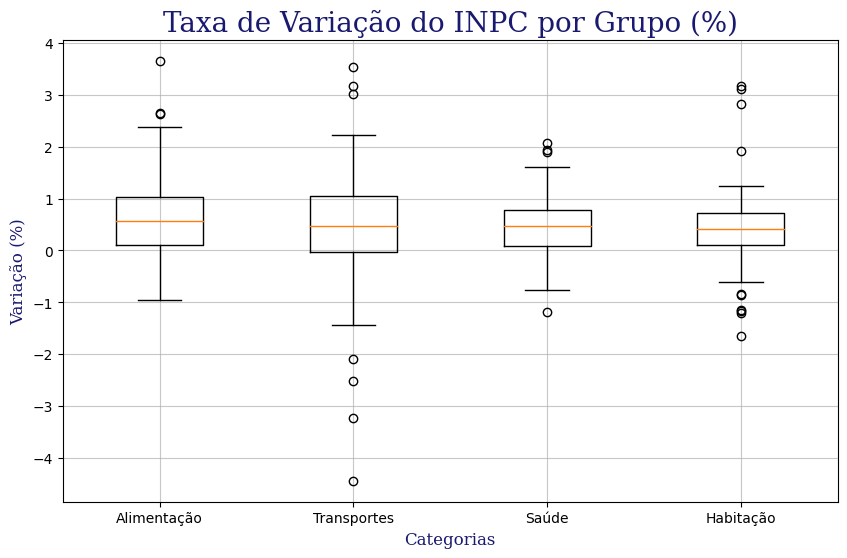

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([inpc_alimentacao, inpc_transportes, inpc_saude, inpc_habitacao], labels=['Alimentação', 'Transportes', 'Saúde', 'Habitação'])

font1 = {'family':'serif','color':'midnightblue','size':20}
font2 = {'family':'serif','color':'midnightblue','size':12}
plt.title('Taxa de Variação do INPC por Grupo (%)', fontdict=font1)
plt.xlabel('Categorias', fontdict=font2)
plt.ylabel('Variação (%)', fontdict=font2)
plt.grid(True, linestyle='-', alpha=0.7)

Com base nos gráficos, busco as datas em que valores discrepantes ocorreram, a fim de buscar explicações

In [ ]:
# Procurando outliers na categoria "Alimentação":
alimentacao_maiores = df_poder_compra.nlargest(5, 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)')
alimentacao_maiores[['Data', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)']]

,Data,INPC - alimentos e bebidas - taxa de variação - (% a.m.)
11,2019-12-01,3.66
22,2020-11-01,2.65
21,2020-09-01,2.63
39,2022-03-01,2.39
40,2022-04-01,2.26


In [ ]:
alimentacao_menores = df_poder_compra.nsmallest(5, 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)')
alimentacao_menores[['Data', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)']]

,Data,INPC - alimentos e bebidas - taxa de variação - (% a.m.)
66,2024-07-01,-0.95
56,2023-08-01,-0.91
57,2023-09-01,-0.74
54,2023-06-01,-0.66
67,2024-08-01,-0.63


In [ ]:
transporte_maiores = df_poder_compra.nlargest(5, 'INPC - transportes - taxa de variação - (% a.m.)')
transporte_maiores[['Data', 'INPC - transportes - taxa de variação - (% a.m.)']]

,Data,INPC - transportes - taxa de variação - (% a.m.)
27,2021-03-01,3.54
34,2021-11-01,3.18
39,2022-03-01,3.01
26,2021-02-01,2.23
51,2023-03-01,2.23


In [ ]:
transporte_menores = df_poder_compra.nsmallest(5, 'INPC - transportes - taxa de variação - (% a.m.)')
transporte_menores[['Data', 'INPC - transportes - taxa de variação - (% a.m.)']]

,Data,INPC - transportes - taxa de variação - (% a.m.)
43,2022-07-01,-4.44
44,2022-08-01,-3.24
16,2020-04-01,-2.52
45,2022-09-01,-2.09
17,2020-05-01,-1.44


In [ ]:
saude_maiores = df_poder_compra.nlargest(5, 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)')
saude_maiores[['Data', 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)']]

,Data,INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)
47,2022-12-01,2.08
40,2022-04-01,1.94
4,2019-04-01,1.89
50,2023-02-01,1.61
44,2022-08-01,1.60


In [ ]:
habitacao_maiores = df_poder_compra.nlargest(5, 'INPC - habitação - taxa de variação - (% a.m.)')
habitacao_maiores[['Data', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data,INPC - habitação - taxa de variação - (% a.m.)
31,2021-07-01,3.17
23,2020-12-01,3.12
33,2021-09-01,2.83
29,2021-05-01,1.91
39,2022-03-01,1.24


In [ ]:
habitacao_menores = df_poder_compra.nsmallest(5, 'INPC - habitação - taxa de variação - (% a.m.)')
habitacao_menores[['Data', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data,INPC - habitação - taxa de variação - (% a.m.)
41,2022-05-01,-1.65
40,2022-04-01,-1.20
55,2023-07-01,-1.16
25,2021-01-01,-1.15
11,2019-12-01,-0.86


In [ ]:
df_2019 = df_poder_compra[df_poder_compra['Data_mes'].str.contains('2019-')]
df_2019[['Data_mes', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)', 'INPC - transportes - taxa de variação - (% a.m.)', 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data_mes,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.)
0,2019-01,0.90,0.61,0.01,0.16
1,2019-01,0.02,0.35,0.42,-0.60
2,2019-02,0.94,0.34,0.40,0.32
3,2019-03,1.50,1.18,0.37,0.32
4,2019-04,0.64,0.91,1.89,0.30
5,2019-05,-0.59,0.56,0.44,1.00
6,2019-06,-0.18,-0.30,0.71,0.03
7,2019-07,-0.05,-0.41,-0.63,1.20
8,2019-08,-0.49,-0.08,-0.14,1.18
9,2019-09,-0.42,-0.01,0.78,0.04


In [ ]:
df_2020 = df_poder_compra[df_poder_compra['Data_mes'].str.contains('2020-')]
df_2020[['Data_mes', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)', 'INPC - transportes - taxa de variação - (% a.m.)', 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data_mes,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.)
12,2020-01,0.45,0.43,-0.76,0.45
13,2020-01,2.11,0.68,0.48,0.38
14,2020-02,0.13,-0.18,0.91,-0.41
15,2020-03,1.12,-0.41,0.20,0.12
16,2020-04,1.91,-2.52,-0.24,-0.14
17,2020-05,0.40,-1.44,-0.16,-0.29
18,2020-06,0.37,0.60,0.07,0.10
19,2020-07,0.14,0.84,0.46,0.94
20,2020-08,0.80,0.77,0.54,0.39
21,2020-09,2.63,0.69,-0.21,0.46


In [ ]:
df_2022 = df_poder_compra[df_poder_compra['Data_mes'].str.contains('2022-')]
df_2022[['Data_mes', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)', 'INPC - transportes - taxa de variação - (% a.m.)', 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data_mes,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.)
36,2022-01,1.08,0.19,0.67,0.17
37,2022-01,0.60,-0.01,1.35,0.40
38,2022-02,1.25,0.51,0.91,0.47
39,2022-03,2.39,3.01,1.29,1.24
40,2022-04,2.26,1.56,1.94,-1.20
41,2022-05,0.63,1.11,1.24,-1.65
42,2022-06,0.78,0.42,0.87,0.53
43,2022-07,1.31,-4.44,0.27,-0.83
44,2022-08,0.26,-3.24,1.60,-0.07
45,2022-09,-0.51,-2.09,0.49,0.72


In [ ]:
df_2023 = df_poder_compra[df_poder_compra['Data_mes'].str.contains('2023-')]
df_2023[['Data_mes', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)', 'INPC - transportes - taxa de variação - (% a.m.)', 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data_mes,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.)
48,2023-01,0.23,-0.05,0.23,0.01
49,2023-01,0.52,0.65,-0.24,0.19
50,2023-02,0.04,0.60,1.61,0.90
51,2023-03,-0.07,2.23,0.72,0.54
52,2023-04,0.61,0.41,1.30,0.46
53,2023-05,0.16,-0.14,1.02,0.78
54,2023-06,-0.66,-0.34,0.15,0.51
55,2023-07,-0.59,1.17,0.10,-1.16
56,2023-08,-0.91,0.37,0.57,1.22
57,2023-09,-0.74,1.07,-0.16,0.44


In [ ]:
df_2024 = df_poder_compra[df_poder_compra['Data_mes'].str.contains('2024-')]
df_2024[['Data_mes', 'INPC - alimentos e bebidas - taxa de variação - (% a.m.)', 'INPC - transportes - taxa de variação - (% a.m.)', 'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)', 'INPC - habitação - taxa de variação - (% a.m.)']]

,Data_mes,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.)
60,2024-01,1.51,-0.10,0.81,0.16
61,2024-02,0.95,1.04,0.62,0.31
62,2024-03,0.50,-0.08,0.32,0.15
63,2024-04,0.57,0.32,1.08,-0.12
64,2024-05,0.64,0.36,0.77,0.62
65,2024-06,0.44,0.00,0.54,0.29
66,2024-07,-0.95,1.36,0.18,0.75
67,2024-08,-0.63,0.05,0.14,-0.60


Conforme mostrado no gráfico e nas tabelas, alimentação é o grupo com maiores taxas de variação, principalmente em 2020 e 2022, sendo o 2° grupo com mais dispersão dos dados. A categoria mais dispersa é a de transportes, principalmente devido a outliers em 2020 e 2022. Já saúde e habitação não apresentam muitas variações de suas taxas, exceto alguns outliers em habitação (tanto para aumentos quanto para quedas).

No **primeiro semestre de 2019**, nota-se **aumento da inflação em quase todos os grupos**, apresentando as maiores taxas do ano dentro de transporte e saúde, e a segunda maior taxa em alimentação. No **final do 1° e começo do 2° semestre**, houve **deflação** para a maioria dos grupos, exceto habitação, e a **inflação volta a crescer no fim do ano**, sendo observada a maior variação do ano em **alimentação**.

Ao longo de **2020**, é importante destacar a **alta de preços geral**, **principalmente** dentro do grupo de **alimentação**, possuindo as 2° e 3° maiores taxas dentro do período analisado (Janeiro de 2019 a Agosto de 2024). Esse cenário com certeza impactou negativamente no poder de compra das famílias brasileiras, uma vez que alimentação possui grande participação no gasto familiar mensal. A principal **exceção** é a categoria de **transportes**, na qual houve deflação em alguns meses, possivelmente devido a baixa demanda decorrente do isolamento social.

**Em 2022**, ainda há taxas de variação altas no segmento de alimentação, ainda que não tão altas quanto em anos anteriores, e alguns meses de deflação em transportes e habitação. O ano terminou com alta em saúde e cuidados pessoais, e uma variação um pouco acima da mediana para alimentação.

**Em 2023**, grupo de alimentação possui taxas menores de inflação ao longo do ano, com suscessivas quedas de preço entre Junho e Setembro, as taxas para habitação estão próximas da mediana geral. Apesar de taxas ainda um pouco altas em alguns meses no segmento de saúde e cuidados pessoais, a inflação apresenta-se mais controlada que em anos anteriores.

**Em 2024**, o grupo de alimentação apresenta taxa superior ao terceiro quartil no primeiro mês, se estabilizando ao longo dos meses, e com queda a partir de Julho. Para todos os grupos, as taxas são menores quando comparadas a anos anteriores, e o cenário é positivo.

# Normalização da taxa de desemprego utilizando o z-score (pontuação z), de forma a facilitar a comparação com outras variáveis, uma vez que padroniza os valores em torno da média e do desvio padrão.

Escolhemos utilizar o z-score para nos ajudar a identificar desvios significativos da média, para analisar é importante saber que:
* Um z-score positivo indica que a taxa de desemprego está acima da média histórica.
* Um z-score negativo indica que a taxa de desemprego está abaixo da média histórica.
* Valores maiores que 2 ou menores que -2 indicam que o valor está muito fora da norma, logo, pode indicar eventos econômicos relevantes e incomuns.

In [ ]:
df_poder_compra.columns

Index(['Data', 'IPCA  (% a.m.)', 'INPC  (% a.m.)', 'Salário mínimo real',
       'Salário mínimo vigente', 'Taxa de desempego (desocupação)',
       ' Endividamento e inadimplência do consumidor',
       'Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min',
       'Intenção de consumo das famílias (ICF) - Acima de 10 salários min',
       'INPC - alimentos e bebidas - taxa de variação - (% a.m.)',
       'INPC - transportes - taxa de variação - (% a.m.)',
       'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)',
       'INPC - habitação - taxa de variação - (% a.m.)', 'Data_mes',
       'Diferença percentual entre salários'],
      dtype='object')

In [ ]:
df_poder_compra.iloc[:,5]

,Taxa de desempego (desocupação)
0,12.2
1,11.8
2,12.6
3,12.8
4,12.6
...,...
63,7.5
64,7.1
65,6.9
66,6.8


In [ ]:
# Calcula-se a média e o desvio padrão
media_desemprego = df_poder_compra.iloc[:, 5].mean() #coluna 'Taxa de desempeno (desocupação)'
desvio_padrao_desemprego = df_poder_compra.iloc[:, 5].std()

# Cálculo do z-score (taxa de desemprego normalizada)
df_poder_compra['Desemprego Normalizado'] = (df_poder_compra.iloc[:, 5] - media_desemprego) / desvio_padrao_desemprego
df_poder_compra['Desemprego Normalizado']


,Desemprego Normalizado
0,0.515492
1,0.363416
2,0.667567
3,0.743605
4,0.667567
...,...
63,-1.271397
64,-1.423472
65,-1.499510
66,-1.537529


### Medidas descritivas para a taxa de desemprego

In [ ]:
media_desemprego = np.mean(df_poder_compra.iloc[:, 5])
print(f"Média da Taxa de Desemprego (2019.01-2024.08): {media_desemprego:.2f}%")
print("Desvio Padrão:", np.std(df_poder_compra.iloc[:, 5]))
print("Taxa de Desemprego mínima:", np.min(df_poder_compra.iloc[:, 5]))
print("Primeiro Quartil:", np.quantile(df_poder_compra.iloc[:, 5], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra.iloc[:, 5]))
print("Terceiro Quartil:", np.quantile(df_poder_compra.iloc[:, 5], 0.75))
print("Taxa de Desemprego máxima:", np.max(df_poder_compra.iloc[:, 5]))

Média da Taxa de Desemprego (2019.01-2024.08): 10.84%
Desvio Padrão: 2.6108586796268196
Taxa de Desemprego mínima: 6.6
Primeiro Quartil: 8.25
Mediana (Q2): 11.25
Terceiro Quartil: 12.725
Taxa de Desemprego máxima: 14.9


### Análise do Desemprego Normalizado e da Taxa de Desemprego no Brasil

**1. Taxa de Desemprego Normalizada**
- No primeiro gráfico, há a **taxa de desemprego normalizada** ao longo do tempo. A linha demonstra a variação mensal da taxa de desemprego. Observamos que, ao longo do período analisado, a taxa apresenta flutuações, com picos notáveis, como no início de 2020 e no final, permanecendo até o início de 2021, reflexo direto da pandemia de COVID-19.
  Além disso, há um vale no primeiro trimestre de 2020, que coincide com o agravamento da pandemia. O gráfico também revela que grande parte das quedas na taxa de desemprego ocorre no final do ano, o que pode ser atribuído às festas de fim de ano, como natal e ano novo, e ao aumento das contratações temporárias que movimentam o mercado.

- Considerando os anos analisados (janeiro de 2019 a agosto de 2024), a taxa de desemprego vem diminuindo de forma gradual desde o primeiro semestre de 2021. Essa tendência de queda pode ser atribuída à recuperação econômica pós-pandemia, com a reabertura de negócios e a retomada de atividades produtivas. Além disso, políticas de incentivo ao emprego e a evolução do mercado de trabalho em setores chave, como serviços e comércio, têm contribuído para essa melhoria. Assim, a análise sugere um panorama otimista para a economia brasileira, com a expectativa de que essa tendência de queda na taxa de desemprego continue nos próximos meses.

**2. Taxa de Desemprego e sua regressão linear**

- No segundo gráfico, comparamos a **taxa de desemprego** efetiva com a **taxa natural de desemprego**, representada por uma linha de regressão linear. Os pontos pretos representam os valores mensais da taxa de desemprego, enquanto a linha pontilhada indica a tendência a longo prazo.

- A análise da linha de regressão mostra se a taxa de desemprego está se aproximando ou se afastando da taxa natural, que é geralmente vista como uma taxa de equilíbrio em uma economia saudável. Se a taxa efetiva estiver significativamente acima da taxa natural, isso pode indicar um mercado de trabalho mais fraco, onde há dificuldades para os trabalhadores encontrarem emprego. Se ela estiver abaixo, como é a situação nos últimos meses da análise, indica ambiente econômico em recuperação, com crescimento em setores que exigem mais mão de obra e aumento na confiança dos consumidores e empresários. Isso pode, por sua vez, estimular investimentos e impulsionar ainda mais o emprego no país.



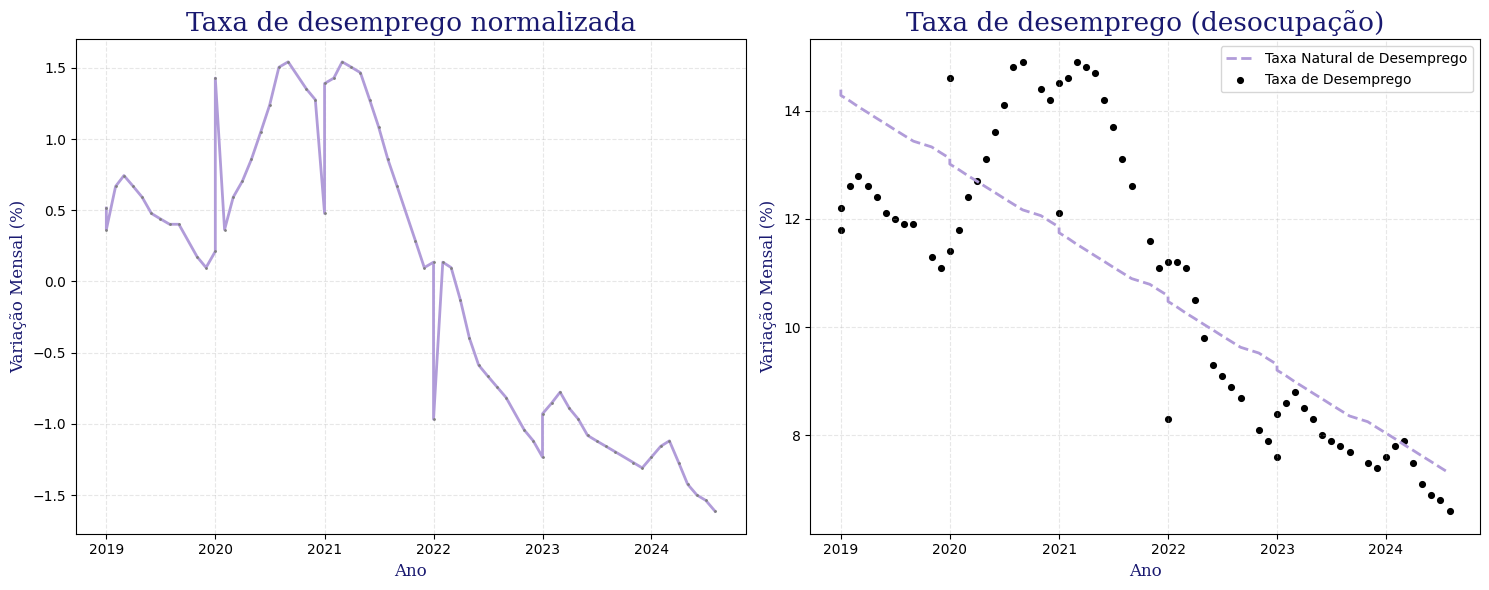

In [ ]:
# Analisar o desemprego normalizado e a taxa de desemprego graficamente e buscar tendências

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt

font1 = {'family': 'serif', 'color': 'midnightblue', 'size': 19}
font2 = {'family': 'serif', 'color': 'midnightblue', 'size': 12}

axs[0].plot(df_poder_compra['Data'], df_poder_compra['Desemprego Normalizado'], linestyle='-', color='#b19cd9', linewidth=2, marker = 'o', ms = 1,  mec='Gray')
axs[0].set_title('Taxa de desemprego normalizada', fontdict=font1)
axs[0].set_xlabel('Ano', fontdict = font2)
axs[0].set_ylabel('Variação Mensal (%)', fontdict=font2)
axs[0].grid(True, linestyle='--', alpha=0.3)

#Gráfico de dispersão da taxa de desemprego e a linha da taxa de desemprego natural do Brasil com regressão linear
x = np.arange(len(df_poder_compra))
y = df_poder_compra.iloc[:, 5].values  #coluna da taxa de desemprego
m, b = np.polyfit(x, y, 1)  # coeficientes da regressão linear

axs[1].plot(df_poder_compra['Data'], m*x + b, color='#b19cd9', linestyle='--', linewidth=2, label='Taxa Natural de Desemprego')
axs[1].scatter(df_poder_compra['Data'], y, color='black', label='Taxa de Desemprego', s=17)
axs[1].legend()
axs[1].set_title('Taxa de desemprego (desocupação)', fontdict = font1)
axs[1].set_xlabel('Ano', fontdict = font2)
axs[1].set_ylabel('Variação Mensal (%)', fontdict = font2)
axs[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Evolução do Endividamento e da Inflação no Brasil

A análise da evolução do endividamento brasileiro em relação à inflação revela uma dinâmica preocupante que afeta o poder de compra das famílias. Nos últimos anos, a taxa de endividamento tem mostrado um aumento constante, coincidindo com períodos de alta inflação.


In [ ]:
df_poder_compra.columns

Index(['Data', 'IPCA  (% a.m.)', 'INPC  (% a.m.)', 'Salário mínimo real',
       'Salário mínimo vigente', 'Taxa de desempego (desocupação)',
       ' Endividamento e inadimplência do consumidor',
       'Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min',
       'Intenção de consumo das famílias (ICF) - Acima de 10 salários min',
       'INPC - alimentos e bebidas - taxa de variação - (% a.m.)',
       'INPC - transportes - taxa de variação - (% a.m.)',
       'INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.)',
       'INPC - habitação - taxa de variação - (% a.m.)', 'Data_mes',
       'Diferença percentual entre salários', 'Desemprego Normalizado'],
      dtype='object')

### Medidas descritivas para a taxa de endividamento

In [ ]:
# Calcular estatísticas da taxa de endividamento

media_endividamento = np.mean(df_poder_compra.iloc[:, 6]*100)
print(f"Média da Taxa de Endividamento (2019.01-2024.08): {media_endividamento:.2f}%")
print("Desvio Padrão:", np.std(df_poder_compra.iloc[:, 6]))
print("Taxa de Endividamento mínima:", np.min(df_poder_compra.iloc[:, 6]))
print("Primeiro Quartil:", np.quantile(df_poder_compra.iloc[:, 6], 0.25))
print("Mediana (Q2):", np.median(df_poder_compra.iloc[:, 6]))
print("Terceiro Quartil:", np.quantile(df_poder_compra.iloc[:, 6], 0.75))
print("Taxa de Endividamento máxima:", np.max(df_poder_compra.iloc[:, 6]))

Média da Taxa de Endividamento (2019.01-2024.08): 72.07%
Desvio Padrão: 0.061460560679440134
Taxa de Endividamento mínima: 0.6
Primeiro Quartil: 0.66
Mediana (Q2): 0.755
Terceiro Quartil: 0.78
Taxa de Endividamento máxima: 0.79


### Comparação entre endividamento e inflação

Os gráficos apresentados destacam a correlação entre a **taxa de endividamento** e o **IPCA** (% a.m.) ao longo do tempo. Observa-se que, em poucos períodos, a inflação apresenta um aumento significativo acompanhado de um crescimento do endividamento das famílias. Desde o primeiro semestre de 2019, mais de 60% da população brasileira tinha dívidas, e nos meses seguintes, o aumento da taxa de endividados se tornou uma tendência constante.

Particularmente em 2021, a taxa de endividamento não apenas aumentou, mas também se estabilizou poucas vezes a níveis elevados. Após esse ano, a média da taxa de endividados se manteve acima de 75%, chegando perto dos 80%. Isso indica que, mesmo com a inflação oscilante, o endividamento se consolidou como um problema persistente para as famílias brasileiras, refletindo desafios em manter o poder de compra e a capacidade de consumo em um cenário econômico adverso.

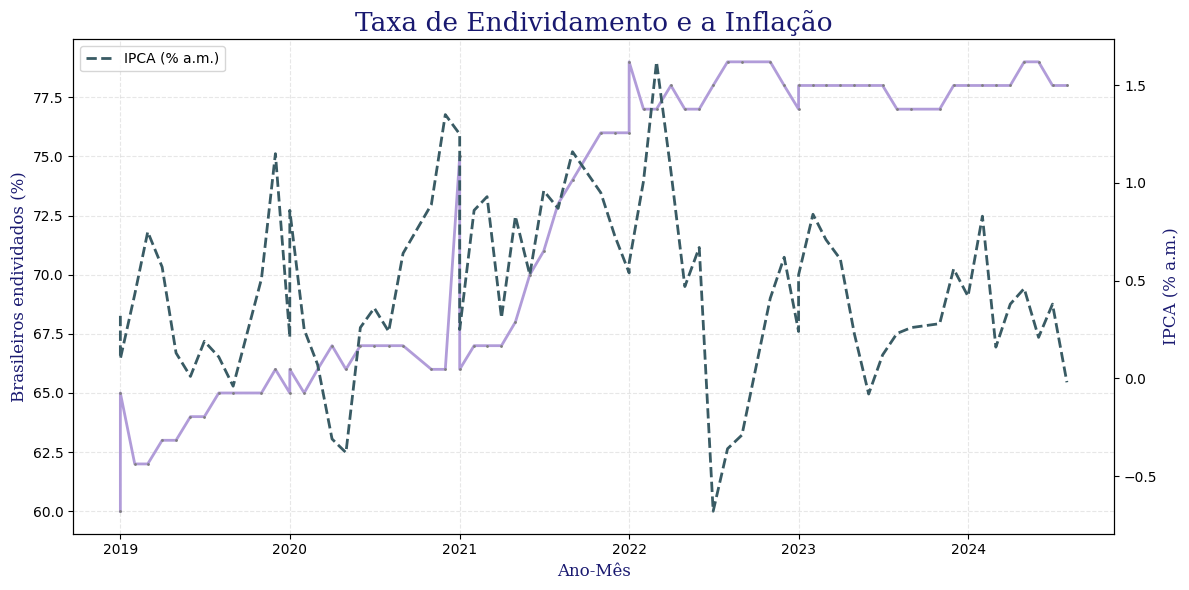

In [ ]:
# comparação entre a taxa de endividamento e a inflação
fig, ax1 = plt.subplots(figsize=(12, 6))

font1 = {'family': 'serif', 'color': 'midnightblue', 'size': 19}
font2 = {'family': 'serif', 'color': 'midnightblue', 'size': 12}

ax1.plot(df_poder_compra['Data'], (df_poder_compra.iloc[:, 6]*100),
         linestyle='-', color='#b19cd9', linewidth=2, marker='o', ms=1, mec='Gray')
ax1.set_title('Taxa de Endividamento e a Inflação', fontdict=font1)
ax1.set_xlabel('Ano-Mês', fontdict=font2)
ax1.set_ylabel('Brasileiros endividados (%)', fontdict=font2)
ax1.grid(True, linestyle='--', alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(df_poder_compra['Data'], df_poder_compra['IPCA  (% a.m.)'],
         linestyle='--', color='#395b64', linewidth=2, label='IPCA (% a.m.)')
ax2.set_ylabel('IPCA (% a.m.)', fontdict=font2)

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Gráfico da Intenção de Consumo em relação à Taxa de Endividamento e IPCA

Os seguintes gráficos apresentam a **Intenção de Consumo das Famílias (ICF)** em dois grupos: abaixo e acima de 10 salários mínimos, em relação à **taxa de endividamento** e à **inflação (IPCA)**.

1. **Gráfico da Intenção de Consumo x Endividamento**
   - Preenche a área abaixo da linha de intenção de consumo para famílias que ganham abaixo de 10 salários mínimos, como também a ICF para as famílias que ganham acima de 10 salários mínimos.
   - Inclui uma linha representando a **taxa de endividamento** no eixo y secundário.

2. **Gráfico da Intenção de Consumo x Inflação**
    - Preenche a área abaixo da linha de intenção de consumo para famílias que ganham abaixo de 10 salários mínimos, como também a ICF para as famílias que ganham acima de 10 salários mínimos.
    - A linha do eixo y secundário representa a **inflação (IPCA)**.

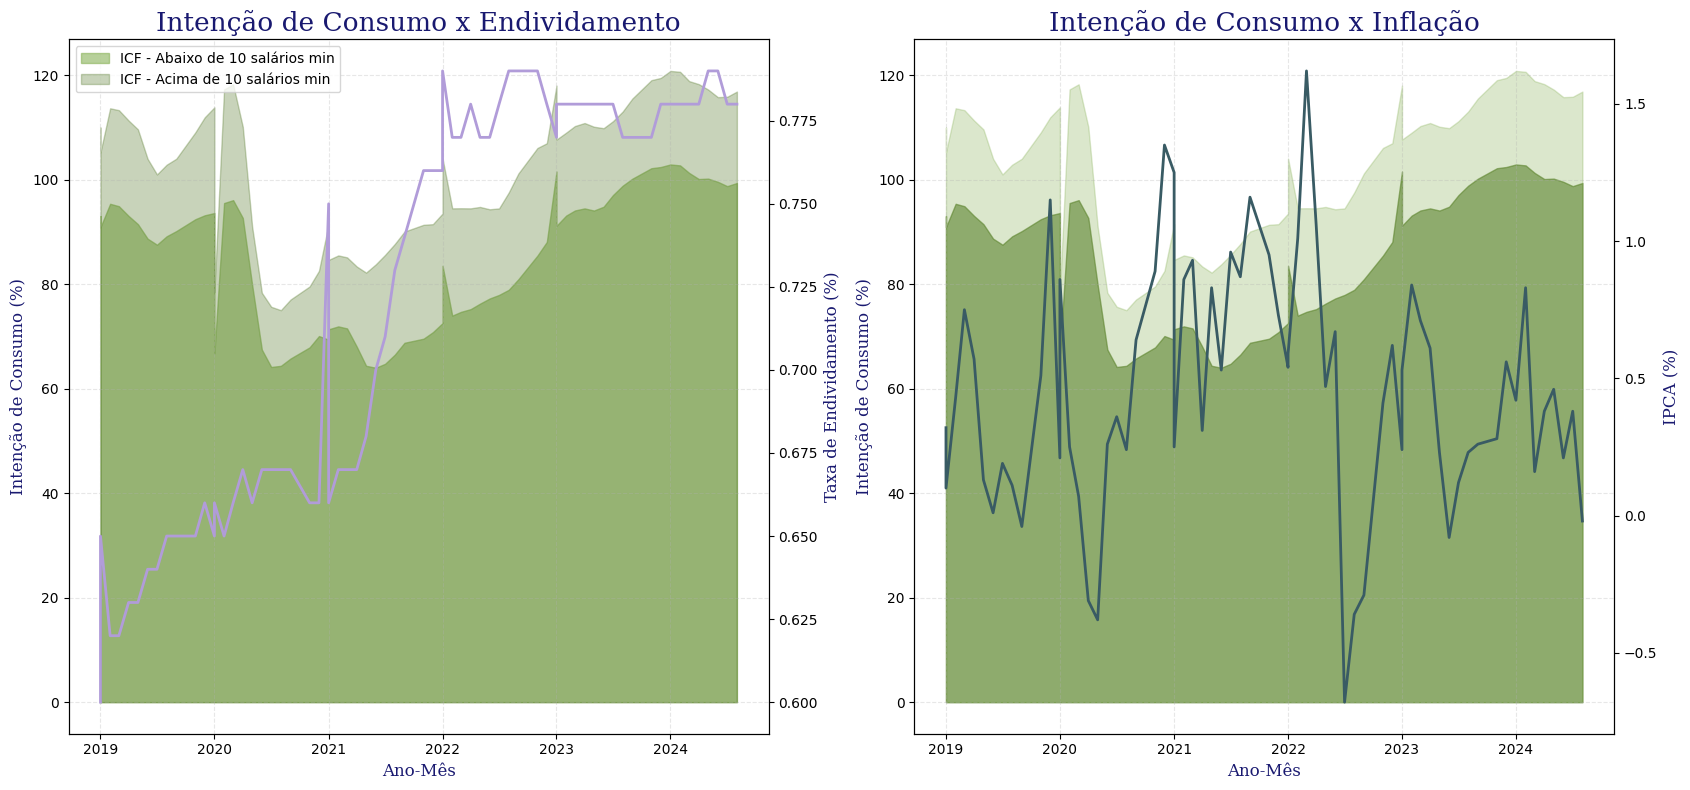

In [ ]:
# Gráfico da Intenção de Consumo - abaixo e acima de 10 salários mínimos em relação a taxa de endividamento
fig, axs = plt.subplots(1, 2, figsize=(17, 8))

font1 = {'family': 'serif', 'color': 'midnightblue', 'size': 19}
font2 = {'family': 'serif', 'color': 'midnightblue', 'size': 12}

x = df_poder_compra['Data']

#gráfico de área
axs[0].fill_between(x,
                    df_poder_compra['Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min'],
                    color='#88b257', alpha=0.6, label='ICF - Abaixo de 10 salários min')

axs[0].fill_between(x,
                    df_poder_compra['Intenção de consumo das famílias (ICF) - Acima de 10 salários min'],
                    color='#4A701c', alpha=0.3, label='ICF - Acima de 10 salários min')

# eixo secundário para a tx de endividamento
ax2_0 = axs[0].twinx()
ax2_0.plot(x, df_poder_compra.iloc[:, 6], color='#b19cd9', linewidth=2, label='Endividamento (%)')
ax2_0.set_ylabel('Taxa de Endividamento (%)', fontdict=font2)

axs[0].set_title('Intenção de Consumo x Endividamento', fontdict=font1)
axs[0].set_xlabel('Ano-Mês', fontdict=font2)
axs[0].set_ylabel('Intenção de Consumo (%)', fontdict=font2)
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].legend(loc='upper left')

#segundo gráfico em relação ao IPCA
axs[1].fill_between(x,
                    df_poder_compra['Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min'],
                    color='#4A701c', alpha=0.6, label='ICF - Abaixo de 10 salários min')

axs[1].fill_between(x,
                    df_poder_compra['Intenção de consumo das famílias (ICF) - Acima de 10 salários min'],
                    color='#88b257', alpha=0.3, label='ICF - Acima de 10 salários min')

# eixo secundário para a inflação
ax2_1 = axs[1].twinx()
ax2_1.plot(x, df_poder_compra['IPCA  (% a.m.)'], color='#395b64', linewidth=2, label='Inflação (IPCA)')
ax2_1.set_ylabel('IPCA (%)', fontdict=font2)

axs[1].set_title('Intenção de Consumo x Inflação', fontdict=font1)
axs[1].set_xlabel('Ano-Mês', fontdict=font2)
axs[1].set_ylabel('Intenção de Consumo (%)', fontdict=font2)
axs[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
df_poder_compra.to_csv('Poder de compra (Base Final).csv', index=False)
df_poder_compra.tail()

,Data,IPCA (% a.m.),INPC (% a.m.),Salário mínimo real,Salário mínimo vigente,Taxa de desempego (desocupação),Endividamento e inadimplência do consumidor,Intenção de consumo das famílias (ICF) - Abaixo de 10 salários min,Intenção de consumo das famílias (ICF) - Acima de 10 salários min,INPC - alimentos e bebidas - taxa de variação - (% a.m.),INPC - transportes - taxa de variação - (% a.m.),INPC - saúde e cuidados pessoais - taxa de variação - (% a.m.),INPC - habitação - taxa de variação - (% a.m.),Data_mes,Diferença percentual entre salários,Desemprego Normalizado
63,2024-04-01,0.38,0.37,1423.75,1412.0,7.5,0.78,100.12,118.28,0.57,0.32,1.08,-0.12,2024-04,-0.825285,-1.271397
64,2024-05-01,0.46,0.46,1417.23,1412.0,7.1,0.79,100.20,117.24,0.64,0.36,0.77,0.62,2024-05,-0.369030,-1.423472
65,2024-06-01,0.21,0.25,1413.69,1412.0,6.9,0.79,99.59,115.79,0.44,0.00,0.54,0.29,2024-06,-0.119545,-1.499510
66,2024-07-01,0.38,0.26,1410.02,1412.0,6.8,0.78,98.76,115.86,-0.95,1.36,0.18,0.75,2024-07,0.140424,-1.537529
67,2024-08-01,-0.02,-0.14,1412.00,1412.0,6.6,0.78,99.36,116.86,-0.63,0.05,0.14,-0.60,2024-08,0.000000,-1.613567
